<a href="https://colab.research.google.com/github/c4bath/cf860/blob/main/DR_Detection_Kaggle_EyePACS_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetic Retinopathy Detection Dataset: Exploratory Data Analysis




https://www.kaggle.com/competitions/diabetic-retinopathy-detection/data

A clinician has rated each image for the severity of diabetic retinopathy on a scale of 0 to 4:

0 - No DR

1 - Mild

2 - Moderate

3 - Severe

4 - Proliferative DR


In [ ]:
# Access google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
import os
os._exit(00)

In [ ]:
# Import libraries
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = '/content/drive/MyDrive/DRdetectionEyePACS/trainLabels.csv'

# Read the dataset
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()


,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [ ]:
# Change diagnosis column and values to DR_Grade and descriptions
diagnosis_map = {
    0: 'No DR',
    1: 'Mild',
    2: 'Moderate',
    3: 'Severe',
    4: 'Proliferative DR'
}

# Map the diagnosis codes to text and create a new column
df['DR_Grade'] = df['level'].map(diagnosis_map)
df = df.drop(columns=['level'])


In [ ]:
df.head()

,image,DR_Grade
0,10_left,No DR
1,10_right,No DR
2,13_left,No DR
3,13_right,No DR
4,15_left,Mild


In [ ]:
report = ProfileReport(df, title='DR Detectiion EyePACS EDA')
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35126 entries, 0 to 35125
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image     35126 non-null  object
 1   DR_Grade  35126 non-null  object
dtypes: object(2)
memory usage: 549.0+ KB


In [ ]:
df.describe()

,image,DR_Grade
count,35126,35126
unique,35126,5
top,10_left,No DR
freq,1,25810


In [ ]:
df.isnull().sum()

image       0
DR_Grade    0
dtype: int64

In [ ]:
df['DR_Grade'].value_counts()

No DR               25810
Moderate             5292
Mild                 2443
Severe                873
Proliferative DR      708
Name: DR_Grade, dtype: int64

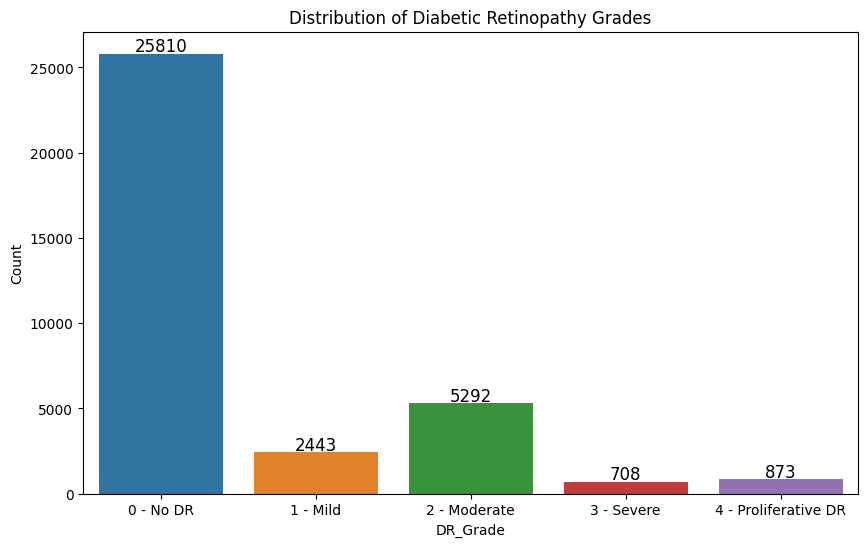

In [ ]:
# Visualization of the class distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='DR_Grade', data=df)
plt.title('Distribution of Diabetic Retinopathy Grades')

DR_Grade_labels = ['0 - No DR', '1 - Mild', '2 - Moderate', '3 - Severe', '4 - Proliferative DR']
ax.set_xticklabels(DR_Grade_labels)

plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()


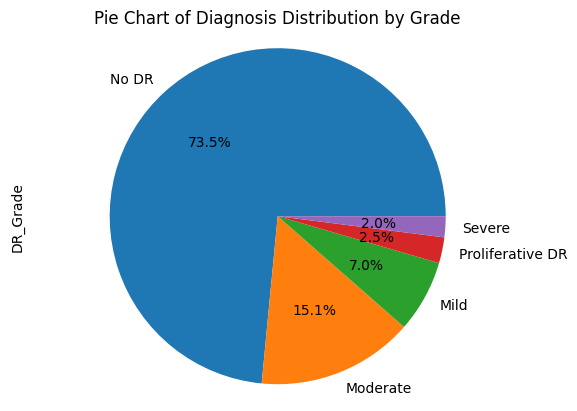

In [ ]:
DR_Grade_labels = ['No DR', 'Moderate', 'Mild', 'Proliferative DR', 'Severe']
df['DR_Grade'].value_counts().plot(kind='pie', labels=DR_Grade_labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Pie Chart of Diagnosis Distribution by Grade')
plt.show()

In [ ]:
print("Classes Balance:")
print(df['DR_Grade'].value_counts(normalize=True))

Classes Balance:
No DR               0.734783
Moderate            0.150658
Mild                0.069550
Severe              0.024853
Proliferative DR    0.020156
Name: DR_Grade, dtype: float64
